 ## NAIVE BAYES CLASSIFIER

## 1. ESSENTIAL IMPORTS

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


from sklearn import metrics
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## 2.  Data  Import and View

In [4]:
data = pd.read_csv("Finance.csv") 

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


https://archive.ics.uci.edu/ml/datasets/bank+marketing

## 3. Checking for Data Types

In [6]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## 4. Checking for Missing Values

In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## 5. Preprocessing

In [8]:
data['y'].replace(to_replace='yes', value=1, inplace=True)
data['y'].replace(to_replace='no',  value=0, inplace=True)

In [9]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [10]:
df_dummies = pd.get_dummies(data)
df_dummies.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


<AxesSubplot:>

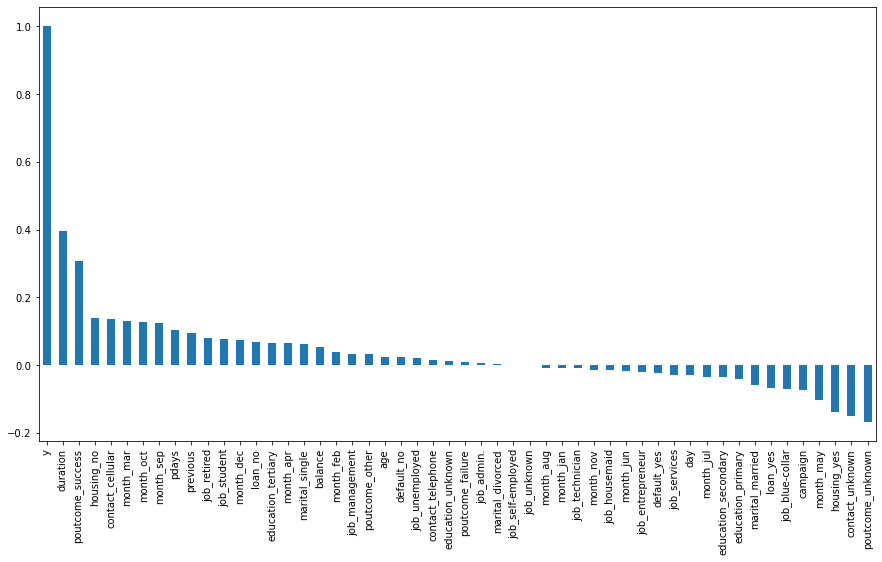

In [11]:
plt.figure(figsize=(15,8))
df_dummies.corr()['y'].sort_values(ascending = False).plot(kind='bar')

In [12]:
# We will use the data frame where we had created dummy variables
y = df_dummies['y'].values
X = df_dummies.drop(columns = ['y'])

## 6. Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 7. Model Fitting and Evaluation 

### A) GaussianNB

In [14]:
clf = GaussianNB().fit(X_train, y_train) 
prediction_test = clf.predict(X_test)

In [15]:
def classification_report(model):
    prediction_test = model.predict(X_test)
    # Print the prediction accuracy
    accuracy = metrics.accuracy_score(y_test, prediction_test)
    confusion_matrix = metrics.confusion_matrix(y_test, prediction_test)
    classification = metrics.classification_report(y_test, prediction_test)

    print('============================== Model Evaluation ==============================')
    print('Classifier :',model)
    print("\n Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
   

In [16]:
classification_report(clf)

============================== Model Evaluation ==============================
Classifier : GaussianNB()

 Model Accuracy:
 0.8560896490710704

Confusion matrix:
 [[10729  1238]
 [  714   883]]

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92     11967
           1       0.42      0.55      0.47      1597

    accuracy                           0.86     13564
   macro avg       0.68      0.72      0.70     13564
weighted avg       0.88      0.86      0.86     13564



In [17]:
class_names=[1,0]
def plot_conf_matrix(y_test, prediction_test, class_names):
    cnf_matrix = metrics.confusion_matrix(y_test, prediction_test)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    

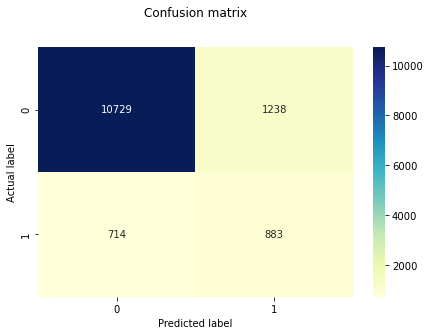

In [18]:
plot_conf_matrix(y_test, prediction_test, class_names)

In [19]:
def plot_roc(model,X_test,y_test):
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label='NB')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('Naive Bayes ROC curve')
    plt.show()

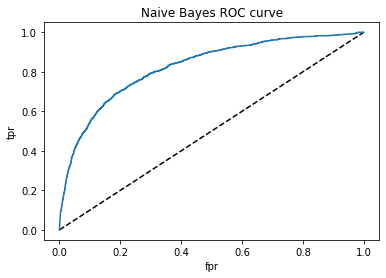

In [20]:
plot_roc(clf,X_test,y_test)

### B: BernouliNB

In [24]:
clf = BernoulliNB().fit(X_train, y_train) 
prediction_test = clf.predict(X_test)

In [25]:
classification_report(clf)

============================== Model Evaluation ==============================
Classifier : BernoulliNB()

 Model Accuracy:
 0.8429666764966087

Confusion matrix:
 [[10804  1163]
 [  967   630]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91     11967
           1       0.35      0.39      0.37      1597

    accuracy                           0.84     13564
   macro avg       0.63      0.65      0.64     13564
weighted avg       0.85      0.84      0.85     13564



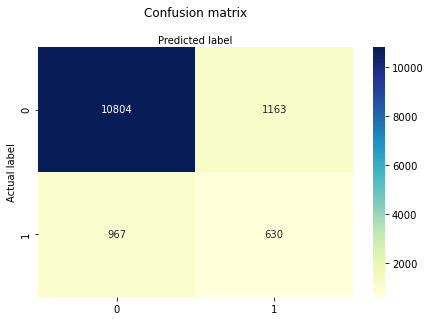

In [26]:
plot_conf_matrix(y_test, prediction_test, class_names)

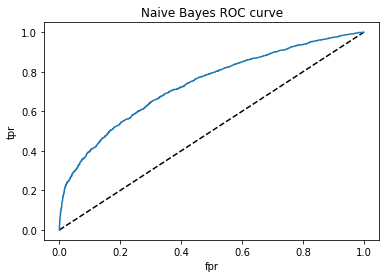

In [27]:
plot_roc(clf,X_test,y_test)

## C. Logistic Regression 

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train) 
prediction_test = clf.predict(X_test)

C:\Users\malik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
classification_report(clf)

============================== Model Evaluation ==============================
Classifier : LogisticRegression()

 Model Accuracy:
 0.8945001474491301

Confusion matrix:
 [[11769   198]
 [ 1233   364]]

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     11967
           1       0.65      0.23      0.34      1597

    accuracy                           0.89     13564
   macro avg       0.78      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



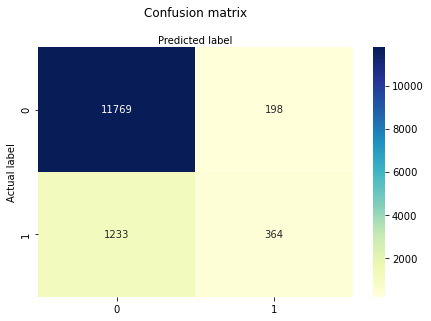

In [30]:
plot_conf_matrix(y_test, prediction_test, class_names)

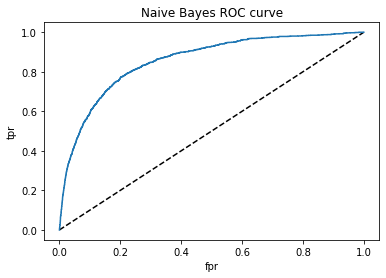

In [31]:
plot_roc(clf,X_test,y_test)

## D. KNN Classification

In [32]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train) 
prediction_test = clf.predict(X_test)

In [33]:
classification_report(clf)

============================== Model Evaluation ==============================
Classifier : KNeighborsClassifier(n_neighbors=7)

 Model Accuracy:
 0.8865378944264228

Confusion matrix:
 [[11615   352]
 [ 1187   410]]

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     11967
           1       0.54      0.26      0.35      1597

    accuracy                           0.89     13564
   macro avg       0.72      0.61      0.64     13564
weighted avg       0.86      0.89      0.87     13564



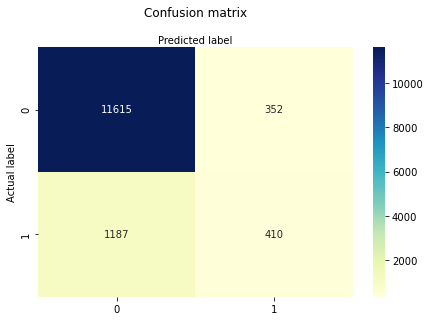

In [34]:
plot_conf_matrix(y_test, prediction_test, class_names)

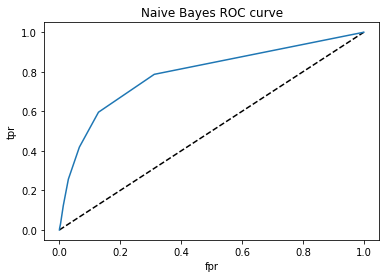

In [35]:
plot_roc(clf,X_test,y_test)

##  END